In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images/images/training/notflip/0036_000000026.jpg
/kaggle/input/images/images/training/notflip/0044_000000017.jpg
/kaggle/input/images/images/training/notflip/0004_000000024.jpg
/kaggle/input/images/images/training/notflip/0035_000000029.jpg
/kaggle/input/images/images/training/notflip/0041_000000005.jpg
/kaggle/input/images/images/training/notflip/0032_000000024.jpg
/kaggle/input/images/images/training/notflip/0005_000000004.jpg
/kaggle/input/images/images/training/notflip/0045_000000001.jpg
/kaggle/input/images/images/training/notflip/0026_000000017.jpg
/kaggle/input/images/images/training/notflip/0057_000000025.jpg
/kaggle/input/images/images/training/notflip/0035_000000031.jpg
/kaggle/input/images/images/training/notflip/0033_000000013.jpg
/kaggle/input/images/images/training/notflip/0058_000000023.jpg
/kaggle/input/images/images/training/notflip/0041_000000031.jpg
/kaggle/input/images/images/training/notflip/0005_000000007.jpg
/kaggle/input/images/images/training/not

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
import os

num_skipped = 0
for folder_name in ("flip", "notflip"):
    folder_path = os.path.join("/kaggle/input/images/images/testing/", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [4]:
import os

num_skipped = 0
for folder_name in ("flip", "notflip"):
    folder_path = os.path.join("/kaggle/input/images/images/training/", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [5]:
image_size = (180,180)
batch_size = 12

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/images/images/training",
    validation_split=0.20,
    subset="both",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)


Found 2392 files belonging to 2 classes.
Using 1914 files for training.
Using 478 files for validation.


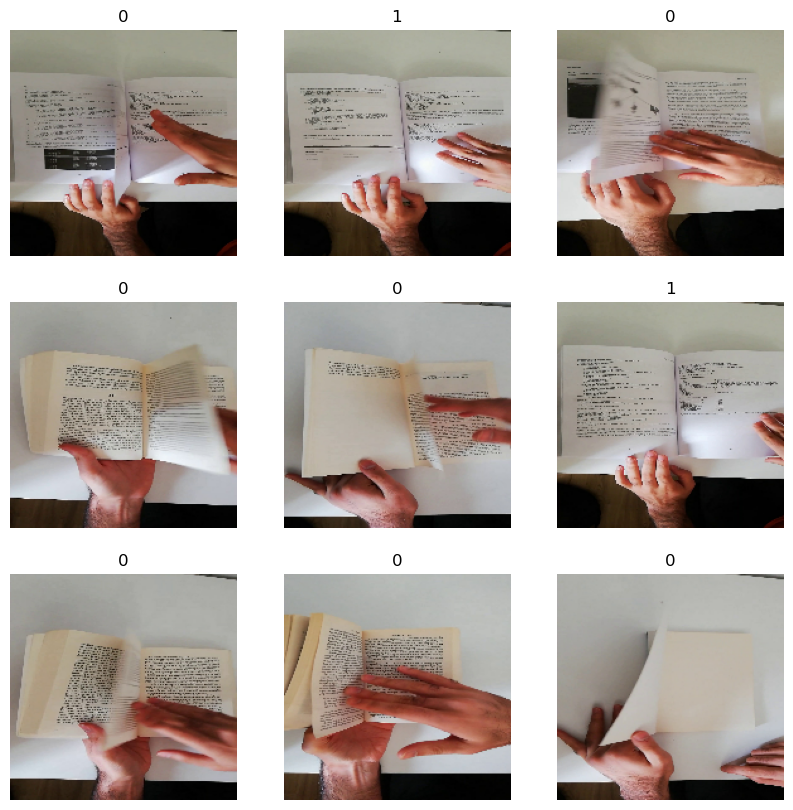

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
        


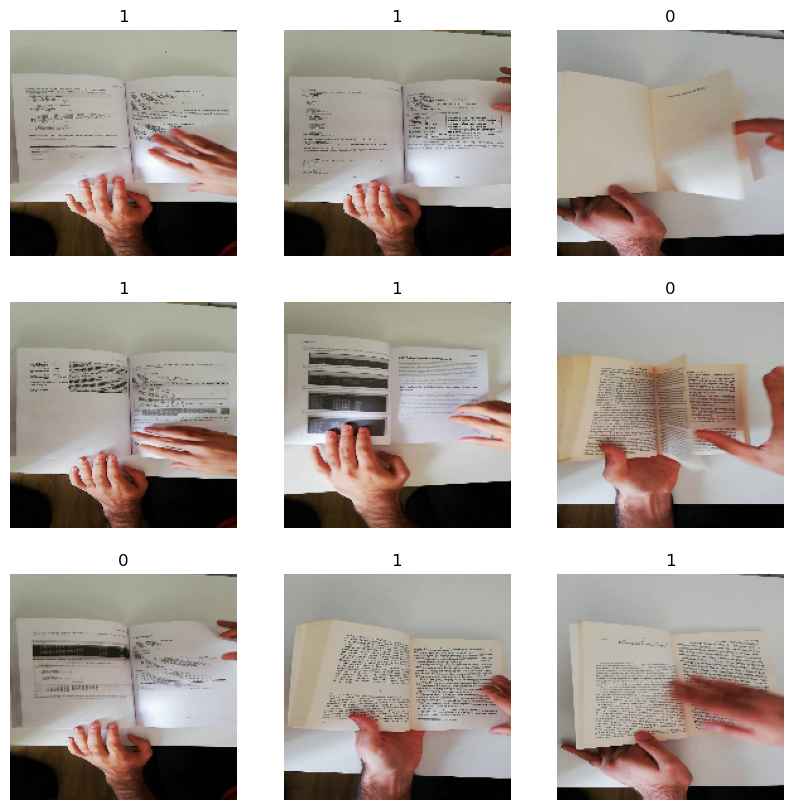

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [8]:
data_augmentation = keras.Sequential(
     [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.3),
     ]
)

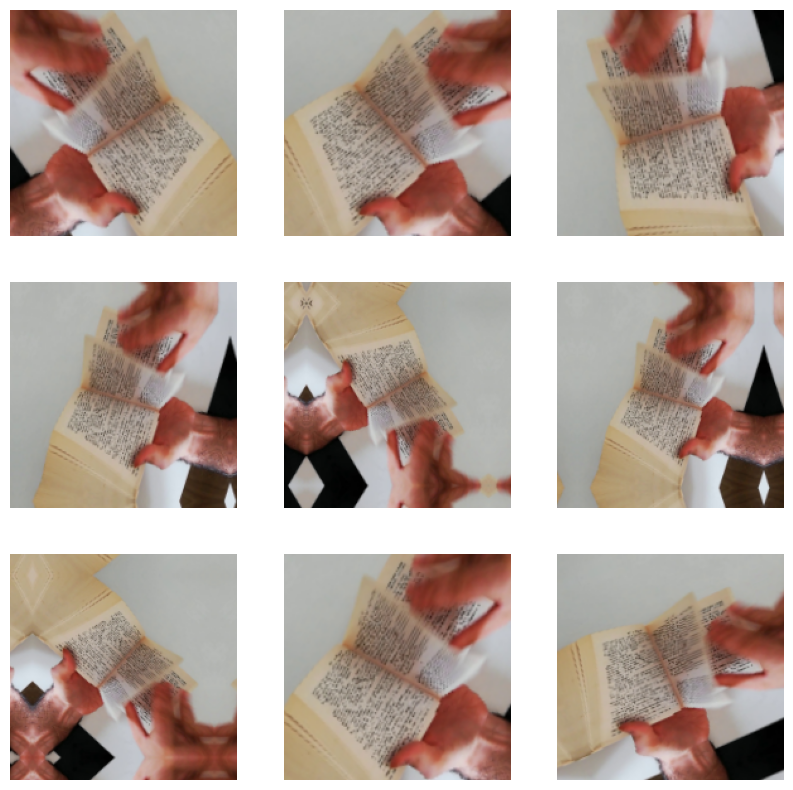

In [9]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
   for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [10]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

In [11]:
#Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
#Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

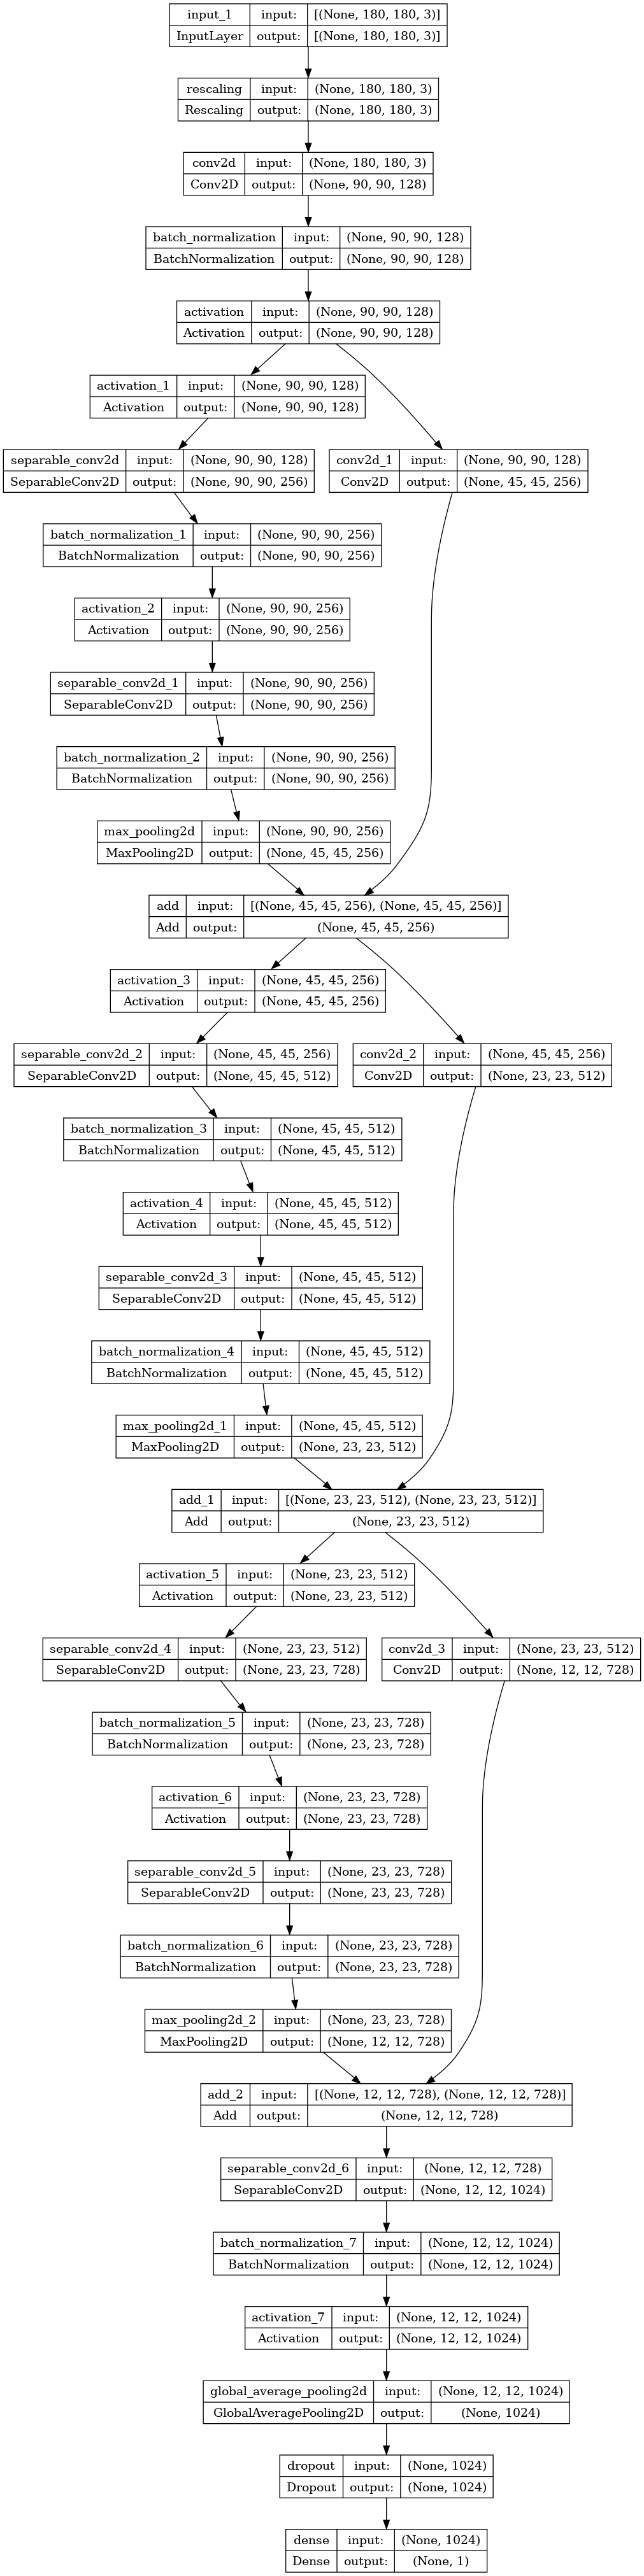

In [12]:

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

    # Increase model complexity
    model.add(layers.Conv2D(1024, 3, padding="same", activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [13]:
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

# Use early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)

model.fit(
    train_ds,
    epochs=epochs,
    callbacks=[early_stopping],
    validation_data=val_ds,
)

Epoch 1/10
160/160 [==============================] - 58s 227ms/step - loss: 0.6039 - accuracy: 0.6792 - val_loss: 0.6964 - val_accuracy: 0.4749
Epoch 2/10
160/160 [==============================] - 35s 211ms/step - loss: 0.4856 - accuracy: 0.7659 - val_loss: 0.7216 - val_accuracy: 0.4749
Epoch 3/10
160/160 [==============================] - 35s 211ms/step - loss: 0.4296 - accuracy: 0.7978 - val_loss: 0.8103 - val_accuracy: 0.4749
Epoch 4/10
160/160 [==============================] - 36s 220ms/step - loss: 0.4139 - accuracy: 0.8083 - val_loss: 0.5954 - val_accuracy: 0.5711
Epoch 5/10
160/160 [==============================] - 35s 211ms/step - loss: 0.3942 - accuracy: 0.8171 - val_loss: 0.3729 - val_accuracy: 0.8431
Epoch 6/10
160/160 [==============================] - 35s 214ms/step - loss: 0.3840 - accuracy: 0.8281 - val_loss: 0.3364 - val_accuracy: 0.8598
Epoch 7/10
160/160 [==============================] - 35s 212ms/step - loss: 0.3734 - accuracy: 0.8265 - val_loss: 0.3277 - val_ac

1/1 [==============================] - 1s 689ms/step
This image is 94.19% flip and 5.81% notflip.
0.05807221680879593


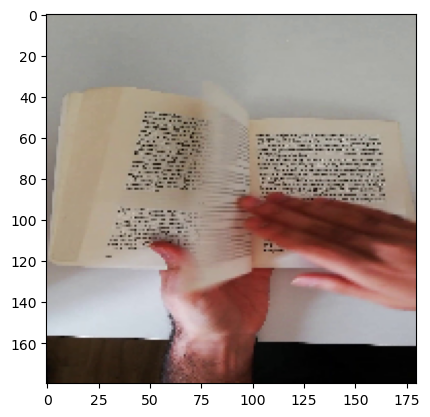

In [14]:
import random

flip_dir = "/kaggle/input/images/images/testing/flip"
flip_files = os.listdir(flip_dir)
flip_file = os.path.join(flip_dir, random.choice(flip_files))

img = keras.utils.load_img(flip_file, target_size=image_size)
img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% flip and {100 * score:.2f}% notflip.")
print(score)
plt.imshow(img)

1/1 [==============================] - 0s 24ms/step
This image is 44.82% flip and 55.18% notflip.
0.5518353581428528


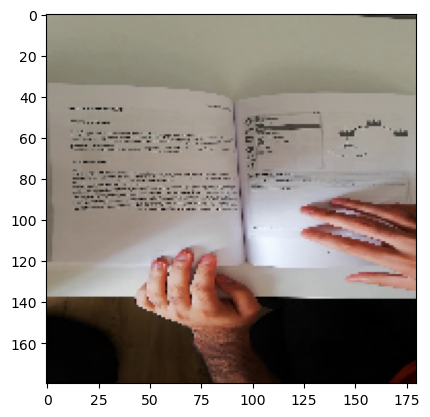

In [15]:
flip_dir = "/kaggle/input/images/images/testing/notflip"
flip_files = os.listdir(flip_dir)
flip_file = os.path.join(flip_dir, random.choice(flip_files))

img = keras.utils.load_img(flip_file, target_size=image_size)
img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% flip and {100 * score:.2f}% notflip.")
print(score)
plt.imshow(img)